In [1]:
## todo
# README.md
# optimizer : learning rate scheduler
# layer : rnn, batch normalization
# analysis : validation error
# fit : callbacks

# tf -> custom calcuration program

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import k.Activations.functions as Activations
import k.Layers.functions as Layers
import k.Losses.functions as Losses
import k.Optimizers.functions as Optimizers
import k.Networks.functions as Networks

2024-04-10 14:28:24.019199: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# prevent oom...
x_train = x_train.reshape(x_train.shape + (1,))[0:1000]
y_train = y_train.reshape(y_train.shape + (1,))[0:1000]
x_test = x_test.reshape(x_test.shape + (1,))[0:100]
y_test = y_test.reshape(y_test.shape + (1,))[0:100]

In [6]:
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
model = Networks.Neural_network()
model.network.append(Layers.Convolution2D(input_shape=x_train.shape[1::], filters=128, kernel_shape=(3, 3)))
model.network.append(Activations.ReLU())
model.network.append(Layers.Pooling2D(pool_type='max'))
model.network.append(Layers.Convolution2D(filters=64, kernel_shape=(2, 2)))
model.network.append(Activations.ReLU())
model.network.append(Layers.Flatten())
model.network.append(Layers.Dense(output_shape=32))
model.network.append(Activations.ReLU())
model.network.append(Layers.Dense(output_shape=10))
model.network.append(Activations.Softmax())

optimizer = Optimizers.Adam(learning_rate=1e-4)
model.compile('cce', optimizer, metrics='mae')

2024-04-10 14:28:26.429727: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.evaluate(x_test, y_test)

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.89238065>, 'metrics': []}

In [9]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1, validation_data=(x_test, y_test))

epoch: 01  | loss : 0.5079  | val_loss : 0.4607  | metrics : 0.1569
epoch: 02  | loss : 0.3494  | val_loss : 0.2613  | metrics : 0.1263
epoch: 03  | loss : 0.1836  | val_loss : 0.1347  | metrics : 0.1030
epoch: 04  | loss : 0.1292  | val_loss : 0.1459  | metrics : 0.1057
epoch: 05  | loss : 0.1140  | val_loss : 0.1465  | metrics : 0.1064
epoch: 06  | loss : 0.1169  | val_loss : 0.1437  | metrics : 0.1080
epoch: 07  | loss : 0.0986  | val_loss : 0.1245  | metrics : 0.0906
epoch: 08  | loss : 0.0878  | val_loss : 0.1050  | metrics : 0.0781
epoch: 09  | loss : 0.0812  | val_loss : 0.0944  | metrics : 0.0735
epoch: 10  | loss : 0.0631  | val_loss : 0.0918  | metrics : 0.0586


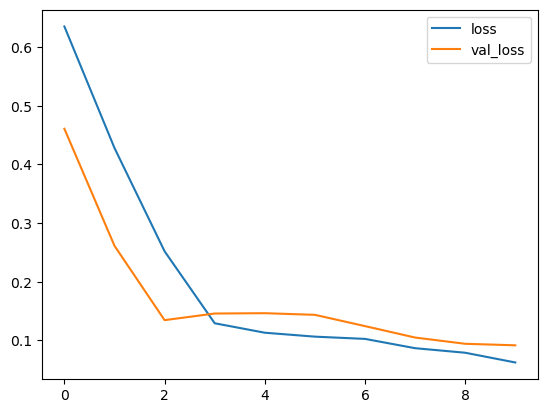

In [10]:
plt.plot(hist['loss'], label='loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [11]:
model.evaluate(x_test, y_test)

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.09177614>, 'metrics': []}

### make tensorflow model to compare

In [15]:
tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.layers.Conv2D(128, input_shape=x_train.shape[1::], kernel_size=3, activation='relu'))
tf_model.add(tf.keras.layers.MaxPooling2D())
tf_model.add(tf.keras.layers.Conv2D(64, kernel_size=2, activation='relu'))
tf_model.add(tf.keras.layers.Flatten())
tf_model.add(tf.keras.layers.Dense(32, activation='relu'))
tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
tf_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['mae'])

In [16]:
tf_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 33ms/step - loss: 2.3063 - mae: 0.1801


[2.3062500953674316, 0.18006449937820435]

In [17]:
tf_hist = tf_model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10


4/4 [==============================] - 25s 6s/step - loss: 2.2908 - mae: 0.1798 - val_loss: 2.2676 - val_mae: 0.1794
Epoch 2/10
4/4 [==============================] - 24s 6s/step - loss: 2.2630 - mae: 0.1792 - val_loss: 2.2383 - val_mae: 0.1786
Epoch 3/10
4/4 [==============================] - 23s 6s/step - loss: 2.2263 - mae: 0.1783 - val_loss: 2.1953 - val_mae: 0.1777
Epoch 4/10
4/4 [==============================] - 23s 6s/step - loss: 2.1811 - mae: 0.1773 - val_loss: 2.1484 - val_mae: 0.1765
Epoch 5/10
4/4 [==============================] - 23s 6s/step - loss: 2.1258 - mae: 0.1759 - val_loss: 2.0879 - val_mae: 0.1749
Epoch 6/10
4/4 [==============================] - 23s 6s/step - loss: 2.0619 - mae: 0.1740 - val_loss: 2.0176 - val_mae: 0.1728
Epoch 7/10
4/4 [==============================] - 23s 6s/step - loss: 1.9845 - mae: 0.1717 - val_loss: 1.9365 - val_mae: 0.1702
Epoch 8/10
4/4 [==============================] - 23s 6s/step - loss: 1.8959 - mae: 0.1686 - val_loss: 1.8447 - val

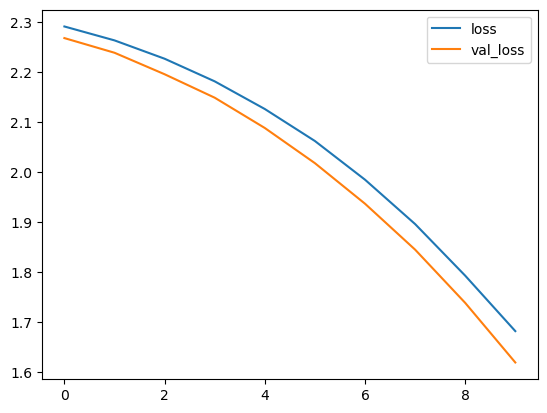

In [18]:
plt.plot(tf_hist.history['loss'], label='loss')
plt.plot(tf_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [19]:
tf_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 35ms/step - loss: 1.6188 - mae: 0.1566


[1.6187890768051147, 0.1565711945295334]